In [ ]:
import pandas as pd
import pyslammer as slam
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats.mstats as ssmstat

from verification_processes import import_verification_data

%matplotlib widget

df = import_verification_data("SLAMMER_results.xlsx")
df["kykmax"] = df["ky (g)"] / df["kmax (g)"]

Note: 
It took 30.7 seconds to run 522 pyslammer simulations (three each).
It took about 12 seconds to run 18 SLAMMER simulations (six each). The actual runtime for the simulations ranged from 0.7 to 71 seconds depending on whether linear elastic or equivalent linear soil model was used.

now running 1260 simulations in pyslammer. 1 min, 37 seconds. Actually, that was mistakenly only running the simulations as linear elastic. the 234 equivalent linear simulations were getting run with only the linear elastic model. when this is corrected, running all the simulations takes 2 min, 17 seconds. That was when I was just running the normal direction. I added the inverse and re-ran (3 minutes 27 seconds).

I had another case where the points weren't in good agreement and after digging into it it was a typo again in how I recoreded my SLAMMER results. Every manual entry is an opportunity for error. This is another motivation behind pySLAMMER. With more programmatic inputs and an output that records the actual input values used in the simulation, this kind of error is les likely to occur.

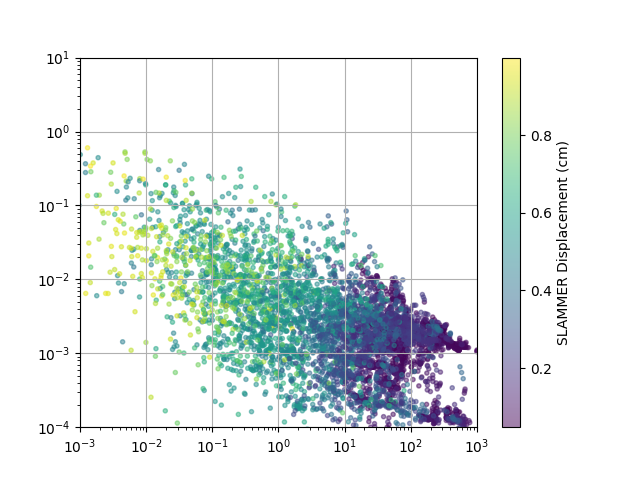

/var/folders/q0/kxmqm5c95n7cxc6mmqklw1k40000gq/T/ipykernel_55389/2319968550.py:50: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Text(0.5, 1.0, 'Comparison of pySLAMMER and SLAMMER results')

In [284]:
dfp = df[df["kykmax"] < 1.0]

plt.close("all")
fig, ax = plt.subplots()


# fig.set_size_inches(8,8)
# for key, grp in df.groupby(["Scale"]):
#     ax.scatter(grp["SLAMMER"],grp["SLAMMER"] - grp["pySLAMMER"], label=key[0], alpha=0.3)
# ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

# percent_error = 1
# asdf = np.linspace(0, 1e3, 10000)
# ax.plot(asdf,0.01 * percent_error * asdf, color="black", linestyle="--")
# ax.plot(asdf,- 0.01 * percent_error * asdf, color="black", linestyle="--")

# Define the colormap
cmap = plt.cm.viridis  # You can use other colormaps like 'plasma', 'coolwarm', etc.

# Define the numeric values for coloring (e.g., SLAMMER values)
color_values = dfp["kykmax"] # Replace with the column you want to use for coloring

# Scatter plot with color mapping
scatter = ax.scatter(
    dfp["SLAMMER"],  # x-axis values
    abs(dfp["SLAMMER"] - dfp["pySLAMMER"]) / dfp["pySLAMMER"],  # y-axis values
    c=color_values,  # Numeric values for coloring
    cmap=cmap,  # Colormap
    alpha=0.5,  # Transparency
    marker=".",
)

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax, alpha=1)
cbar.set_label("SLAMMER Displacement (cm)")  # Label for the colorbar


ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e-3, 1e3)
ax.set_ylim(1e-4, 1e1)
# ax.set_xlim(0, 1000)
# ax.set_ylim(-1, 1)

# ax.set_aspect('equal', adjustable='box')

plt.grid()
plt.show()
# plt.legend(loc='upper right', bbox_to_anchor=(0.2, 1))
plt.legend()

plt.xlabel("SLAMMER displacement (cm)")
plt.ylabel("pySLAMMER displacement (cm)")
plt.title("Comparison of pySLAMMER and SLAMMER results")

In [280]:
scales = [0.001, 0.01, 0.1, 1, 10, 100]
for scale in scales:
    segment = dfp[
        (dfp["SLAMMER"] > scale)
        & (dfp["SLAMMER"] < scale * 10)

    ]
    slope, intercept, r, p, se = ssmstat.linregress(
        segment["SLAMMER"],
        segment["pySLAMMER"],
    )

    max_diff = max(
        abs(segment["pySLAMMER"] - segment["SLAMMER"])
    )
    mean_diff = np.mean(
        abs(segment["pySLAMMER"] - segment["SLAMMER"])
    )
    std_diff = np.std(
        abs(segment["pySLAMMER"] - segment["SLAMMER"])
    )
    p_95 = np.percentile(
        abs(segment["pySLAMMER"] - segment["SLAMMER"]),
        95,
    )
    print(
        f"""Scale: {scale} to {10 * scale} cm:
            Slope = {slope:.2f}, Intercept = {intercept:.2f}, 
            R^2 = {r**2:.3f}, P-value = {p:.3f}, SE = {se:.3f}
            Max difference = {max_diff:.2f} cm, 95th percentile error {p_95:.2f} cm"""
    )


Scale: 0.001 to 0.01 cm:
            Slope = 1.06, Intercept = 0.00, 
            R^2 = 0.538, P-value = 0.000, SE = 0.098
            Max difference = 0.02 cm, 95th percentile error 0.01 cm
Scale: 0.01 to 0.1 cm:
            Slope = 1.00, Intercept = 0.00, 
            R^2 = 0.986, P-value = 0.000, SE = 0.006
            Max difference = 0.03 cm, 95th percentile error 0.01 cm
Scale: 0.1 to 1.0 cm:
            Slope = 1.00, Intercept = 0.00, 
            R^2 = 0.998, P-value = 0.000, SE = 0.002
            Max difference = 0.10 cm, 95th percentile error 0.02 cm
Scale: 1 to 10 cm:
            Slope = 1.00, Intercept = 0.00, 
            R^2 = 1.000, P-value = 0.000, SE = 0.000
            Max difference = 0.44 cm, 95th percentile error 0.07 cm
Scale: 10 to 100 cm:
            Slope = 1.00, Intercept = 0.00, 
            R^2 = 1.000, P-value = 0.000, SE = 0.000
            Max difference = 0.97 cm, 95th percentile error 0.27 cm
Scale: 100 to 1000 cm:
            Slope = 1.00, Intercept =